In [1]:
def load_text(path):
    with open(path) as f:
        document = f.read()
    return document

In [2]:
doc = load_text('Large_Text.text')

In [3]:
import numpy as np
import pandas as pd
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

In [4]:
import matplotlib.pyplot as plt
% matplotlib inline

In [5]:
import warnings
warnings.filterwarnings("ignore")

In [6]:
import spacy

In [7]:
nlp = spacy.load('en_core_web_lg')

In [8]:
from pprint import pprint

In [9]:
doc = nlp(doc)

In [10]:
pprint([(X.text, X.label_) for X in doc.ents])

[('Sherlock Holmes', 'PERSON'),
 ('all night', 'TIME'),
 ('the night', 'TIME'),
 ('Penang', 'GPE'),
 ('James Mor-\n', 'PERSON'),
 ('M.R.C.S.', 'GPE'),
 ('C.C.H.', 'ORG'),
 ('Watson', 'PERSON'),
 ('Holmes', 'PERSON'),
 ('a few minutes', 'TIME'),
 ('one', 'CARDINAL'),
 ('two', 'CARDINAL'),
 ('Watson', 'PERSON'),
 ('Then I was right', 'WORK_OF_ART'),
 ('Watson', 'PERSON'),
 ('Charing Cross', 'ORG'),
 ('Well, Watson', 'WORK_OF_ART'),
 ('Holmes', 'PERSON'),
 ('Watson', 'PERSON'),
 ('Mortimer', 'PERSON'),
 ('Holmes', 'PERSON'),
 ('Holmes', 'PERSON'),
 ('3fresh', 'CARDINAL'),
 ('Mortimer, James', 'ORG'),
 ('M.R.C.S.', 'GPE'),
 ('1882', 'DATE'),
 ('Grimpen', 'PERSON'),
 ('Dartmoor', 'GPE'),
 ('Devon', 'GPE'),
 ('1882 to 1884', 'DATE'),
 ('Comparative Pathology', 'WORK_OF_ART'),
 ('Is Disease', 'WORK_OF_ART'),
 ('the\nSwedish Pathological Society', 'ORG'),
 ('Some Freaks of Atavism', 'WORK_OF_ART'),
 ('Lancet', 'ORG'),
 ('Do We Progress', 'WORK_OF_ART'),
 ('Journal of Psychol-\nogy', 'ORG'),
 (

In [11]:
sentences = [x for x in doc.sents]
print(sentences[:10])

[Mr. Sherlock Holmes, who was usually
very late in the mornings, save upon
those not infrequent occasions when he
was up all night, was seated at the break-
fast table., I stood upon the hearth-rug and picked
up the stick which our visitor had left behind him
, the night before., It was a fine, thick piece of wood,
bulbous-headed, of the sort which is known as a
“Penang lawyer.”, Just under the head was a broad
silver band nearly an inch across., “To James Mor-
timer, M.R.C.S., from his friends of the C.C.H.,” was
engraved upon it, with the date “1884.”, It was just
such a stick as the old-fashioned family practitioner
used to carry—dignified, solid, and reassuring.
, “Really, Watson, you excel yourself,” said
, Holmes, pushing back his chair and lighting a
cigarette., “I am bound to say that in all the ac-
counts which you have been so good as to give of
]


In [12]:
from spacy import displacy

In [13]:
displacy.render(nlp(str(sentences[:10])), jupyter=True, style='ent')

In [14]:
[(x.orth_,x.pos_, x.lemma_) for x in [y 
                                      for y
                                      in nlp(str(sentences[:10])) 
                                      if not y.is_stop and y.pos_ != 'PUNCT']]

[('Mr.', 'PROPN', 'Mr.'),
 ('Sherlock', 'PROPN', 'Sherlock'),
 ('Holmes', 'PROPN', 'Holmes'),
 ('usually', 'ADV', 'usually'),
 ('\n', 'SPACE', '\n'),
 ('late', 'ADV', 'late'),
 ('mornings', 'NOUN', 'morning'),
 ('save', 'VERB', 'save'),
 ('\n', 'SPACE', '\n'),
 ('infrequent', 'ADJ', 'infrequent'),
 ('occasions', 'NOUN', 'occasion'),
 ('\n', 'SPACE', '\n'),
 ('night', 'NOUN', 'night'),
 ('seated', 'VERB', 'seat'),
 ('break-', 'NOUN', 'break-'),
 ('\n', 'SPACE', '\n'),
 ('fast', 'ADJ', 'fast'),
 ('table', 'NOUN', 'table'),
 ('stood', 'VERB', 'stand'),
 ('hearth', 'NOUN', 'hearth'),
 ('rug', 'NOUN', 'rug'),
 ('picked', 'VERB', 'pick'),
 ('\n', 'SPACE', '\n'),
 ('stick', 'NOUN', 'stick'),
 ('visitor', 'NOUN', 'visitor'),
 ('left', 'VERB', 'leave'),
 ('\n', 'SPACE', '\n'),
 ('night', 'NOUN', 'night'),
 ('fine', 'ADJ', 'fine'),
 ('thick', 'ADJ', 'thick'),
 ('piece', 'NOUN', 'piece'),
 ('wood', 'NOUN', 'wood'),
 ('\n', 'SPACE', '\n'),
 ('bulbous', 'ADJ', 'bulbous'),
 ('headed', 'ADJ', 'headed

In [15]:
dict([(str(x), x.label_) for x in nlp(str(sentences[:10])).ents])

{'C.C.H.': 'ORG',
 'Holmes': 'PERSON',
 'James Mor-\n': 'PERSON',
 'M.R.C.S.': 'GPE',
 'Penang': 'GPE',
 'Sherlock Holmes': 'PERSON',
 'Watson': 'PERSON',
 'all night': 'TIME',
 'mornings': 'TIME',
 'the night before': 'TIME'}

In [16]:
displacy.render(nlp(str(sentences)), jupyter=True, style='ent')

In [17]:
from wordcloud import WordCloud, STOPWORDS

In [18]:
stopwords = set(STOPWORDS)

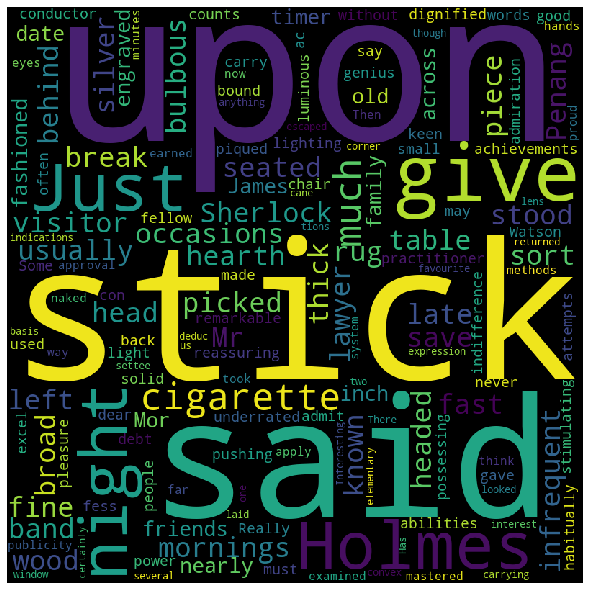

In [19]:
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='black', 
                stopwords = stopwords, 
                min_font_size = 10).generate(str(sentences[:25])) 
  
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 